In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
X = X.iloc[:, :-2]

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [9]:
X.shape

(20640, 6)

In [11]:
X.axes

[RangeIndex(start=0, stop=20640, step=1),
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
        'AveOccup'],
       dtype='object')]

# Zadanie 1: Dokładność oceny modelu vs wielkość zbioru testowego.
Zwizualizuj dokładność oceny jakości modelu w zależności od wielkości zbioru testowego.
1. Opracuj scenariusz eksperymentu.
2. Zaimplementuj realizację obliczeń potrzebnych do prezentacji wyników eksperymentu.
3. Zaprezentuj wyniki dobierając odpowiednie wizualizacje.
4. Odpowiedz na pytanie: w jakim przedziale na 90% znajduje się prawdziwa wartość metryki przy zbiorze testowym wielkości rzędu 1-2 tys. obserwacji oraz przy największym rozważanym przez Ciebie zbiorze testowym. Oprzyj obliczenie na kwantylach z otrzymanych zestawów wyników dla danej wielkości zbioru.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [22]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2_score(y, y_pred)

0.5396977345638283

In [17]:
model.coef_

array([ 5.36910326e-01,  1.65033593e-02, -2.11740382e-01,  9.93729775e-01,
        2.21093787e-05, -4.87715048e-03])

In [18]:
model.intercept_

np.float64(-0.4390934214281681)

In [28]:
y_pred

array([4.24065384, 4.05230016, 3.62473605, ..., 0.77597845, 0.90261232,
       1.16766734])

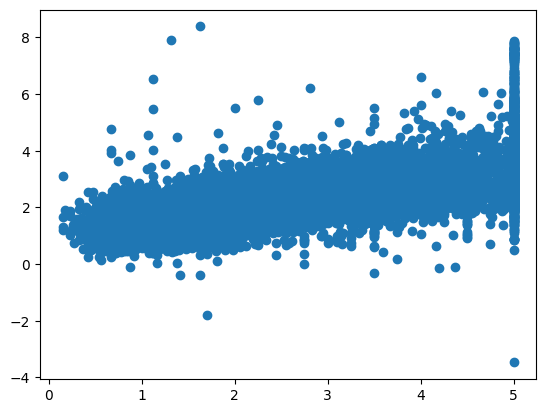

In [31]:
plt.scatter(y, y_pred)
plt.show()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2_score_train = r2_score(y_train, y_pred)


0.5384728142799227

In [46]:
r2_score_test = r2_score(y_test, model.predict(X_test))
r2_score_test

0.5491029712831018

0.1
0.4934960119963864
0.2
0.5299027743702838
0.3
0.5431798817115183
0.4
0.5457229269600119
0.5
0.531476861252119
0.6
0.5331865846149084
0.7
-0.5839106097628564
0.8
-2.3126259323952767
0.9
-2.013971113188034


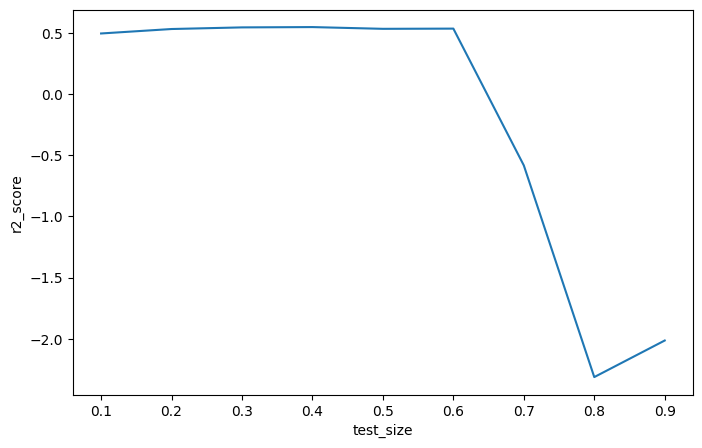

In [50]:
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

r2_score_dict = {}

for size in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2_score_dict[size] = r2_score(y_test, model.predict(X_test))
    print(size)
    print(r2_score_dict[size])

keys  = list(r2_score_dict.keys())
values = list(r2_score_dict.values())
plt.figure(figsize=(8, 5))
plt.plot(keys, values)

plt.xlabel('test_size')
plt.ylabel('r2_score')
plt.show()

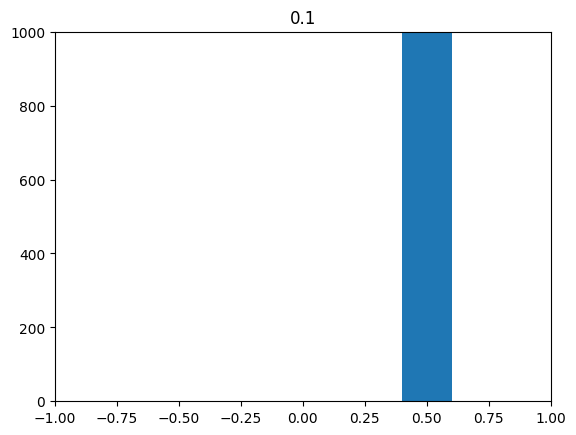

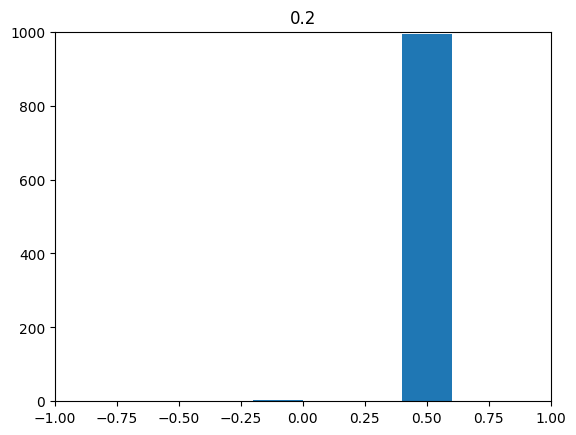

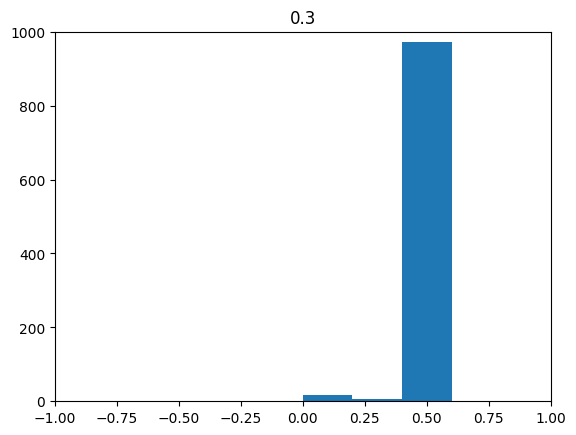

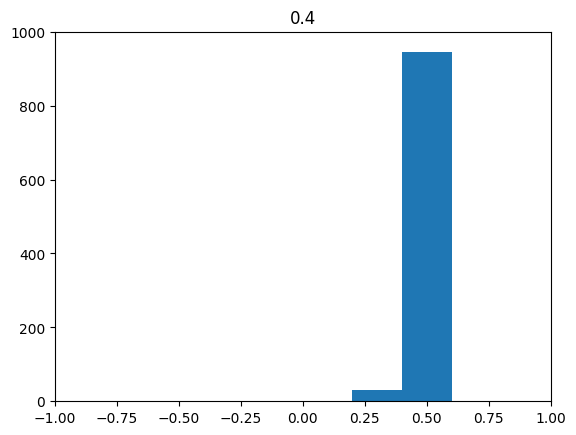

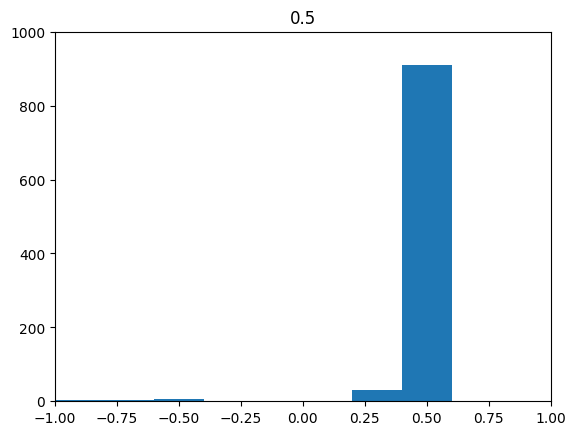

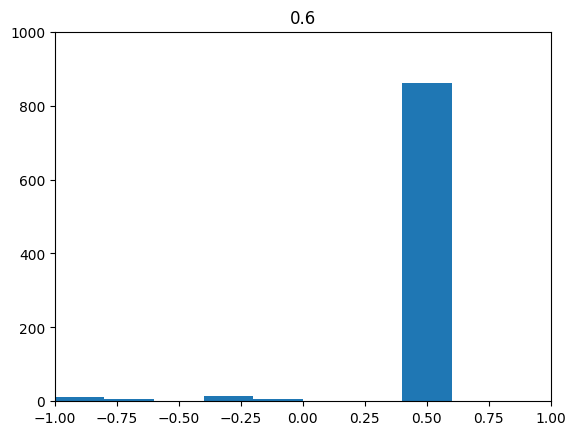

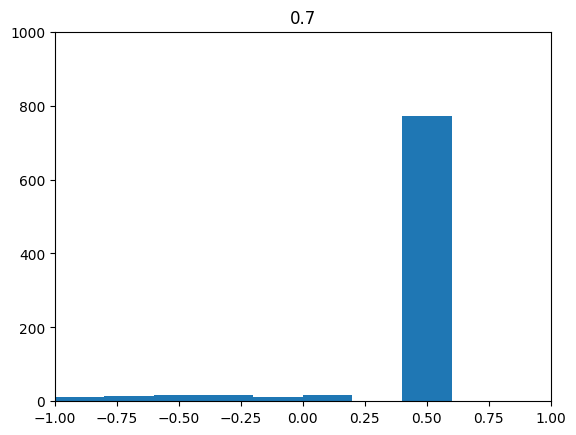

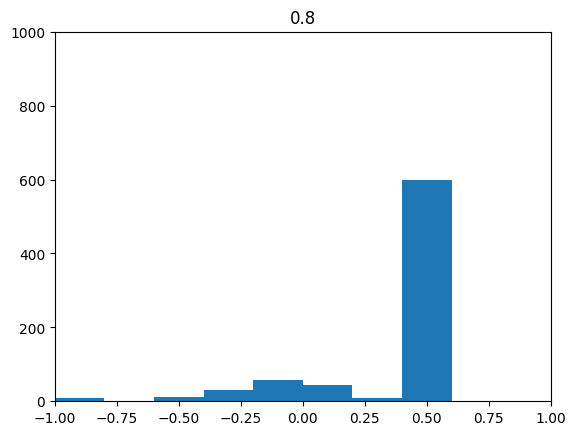

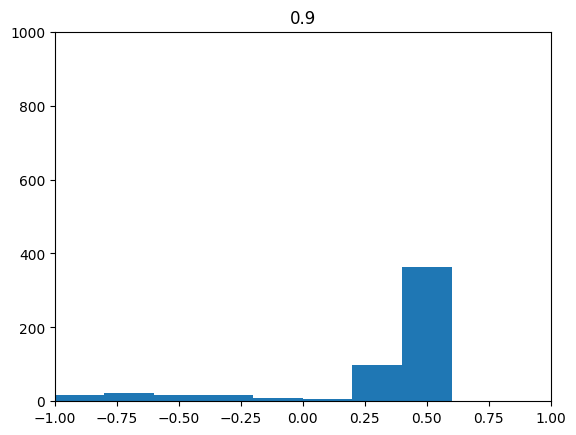

In [51]:
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
r2_score_dict = {key: [] for key in test_size}

for i in range(1000):
    for size in test_size:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
        model = LinearRegression()
        model.fit(X_train, y_train)
        r2_score_dict[size].append(r2_score(y_test, model.predict(X_test)))

for size in test_size:
    plt.hist(r2_score_dict[size], range=(-1,1))
    plt.xlim(-1,1)
    plt.ylim(0,1000)
    plt.title(size)
    plt.show()

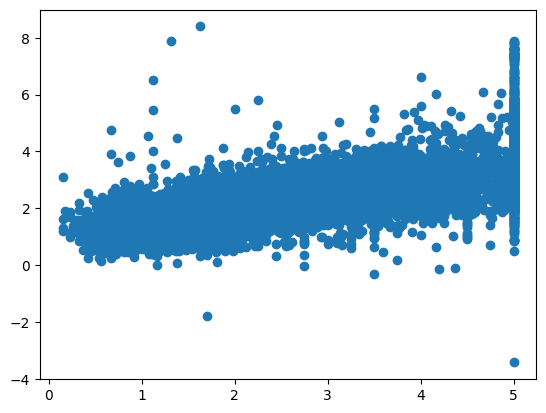

In [44]:
plt.scatter(y_train, y_pred)
plt.show()

# Zadanie 1: Dokładność oceny modelu vs wielkość zbioru testowego.
Zwizualizuj dokładność oceny jakości modelu w zależności od wielkości zbioru testowego.
1. Opracuj scenariusz eksperymentu.
2. Zaimplementuj realizację obliczeń potrzebnych do prezentacji wyników eksperymentu.
3. Zaprezentuj wyniki dobierając odpowiednie wizualizacje.
4. Odpowiedz na pytanie: w jakim przedziale na 90% znajduje się prawdziwa wartość metryki przy zbiorze testowym wielkości rzędu 1-2 tys. obserwacji oraz przy największym rozważanym przez Ciebie zbiorze testowym. Oprzyj obliczenie na kwantylach z otrzymanych zestawów wyników dla danej wielkości zbioru.

## Rozwiązanie trenera

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [22]:
def generate_scores(X, y, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(r2_score(y_test, y_pred))
    return scores

In [23]:
test_size = 1000
num_trials = 10

scores = generate_scores(X, y, test_size, num_trials)
scores

[0.5256419488953155,
 0.6215479197976872,
 0.6319047794654782,
 0.6218027207129924,
 0.5961506089004702,
 0.615964267311258,
 0.5896920067953777,
 0.5763665374570366,
 0.6309718349349502,
 0.6442101126760187]

In [26]:
test_sizes = np.arange(2000, X.shape[0], 2000)
test_sizes

array([ 2000,  4000,  6000,  8000, 10000, 12000, 14000, 16000, 18000,
       20000])

In [27]:
scores = []
for test_size in test_sizes:
    scores.append(generate_scores(X, y, test_size, num_trials))

scores

[[0.6001980040377246,
  0.5769991889794193,
  0.6113906566413394,
  0.5807962820775459,
  0.6102653203385243,
  0.60419430938391,
  0.5721024818742261,
  0.5748636920278195,
  0.5973080082039819,
  0.6220694926130967],
 [0.5813069513130531,
  0.586840847568507,
  0.6076969087384454,
  0.5859191018684831,
  0.5806541530368838,
  0.5794728584514935,
  0.6003283926831757,
  0.6121130824221938,
  0.5842234235246453,
  0.6085903532324307],
 [0.6050078621476734,
  0.6088320670022769,
  0.6162724112792121,
  0.5900347035893667,
  0.6039784613023836,
  0.6063992665998721,
  0.28648173912021035,
  0.6000758532998687,
  0.6122219719297952,
  0.5843361277060302],
 [0.5867114561056517,
  0.5887206646965085,
  0.5978166438199999,
  0.6040123644899085,
  0.5923061955238342,
  0.5972258228525377,
  0.6009174783096984,
  0.6126612869460413,
  0.6000830051559116,
  0.5892581840429129],
 [0.6005756838248054,
  0.6088951313499502,
  0.6051831047553171,
  0.6070217575080123,
  -3.9910854102939117,
  0.603

In [29]:
test_sizes[:5]

array([ 2000,  4000,  6000,  8000, 10000])

In [30]:
scores[:5]

[[0.6001980040377246,
  0.5769991889794193,
  0.6113906566413394,
  0.5807962820775459,
  0.6102653203385243,
  0.60419430938391,
  0.5721024818742261,
  0.5748636920278195,
  0.5973080082039819,
  0.6220694926130967],
 [0.5813069513130531,
  0.586840847568507,
  0.6076969087384454,
  0.5859191018684831,
  0.5806541530368838,
  0.5794728584514935,
  0.6003283926831757,
  0.6121130824221938,
  0.5842234235246453,
  0.6085903532324307],
 [0.6050078621476734,
  0.6088320670022769,
  0.6162724112792121,
  0.5900347035893667,
  0.6039784613023836,
  0.6063992665998721,
  0.28648173912021035,
  0.6000758532998687,
  0.6122219719297952,
  0.5843361277060302],
 [0.5867114561056517,
  0.5887206646965085,
  0.5978166438199999,
  0.6040123644899085,
  0.5923061955238342,
  0.5972258228525377,
  0.6009174783096984,
  0.6126612869460413,
  0.6000830051559116,
  0.5892581840429129],
 [0.6005756838248054,
  0.6088951313499502,
  0.6051831047553171,
  0.6070217575080123,
  -3.9910854102939117,
  0.603

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_15960\3242819763.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[:5], labels=test_sizes[:5])


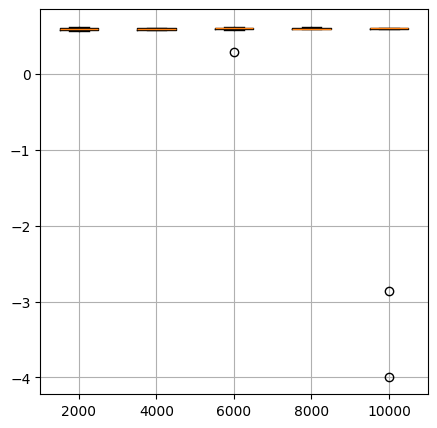

In [31]:
plt.figure(figsize=(5, 5))
plt.boxplot(scores[:5], labels=test_sizes[:5])
plt.grid()
plt.show()

In [64]:
train_size = 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=train_size, random_state=123)
model = LinearRegression()
model.fit(X_train, y_train)

def generate_scores(model, X_test, y_test, test_size, num_trials):
    scores = []
    for _ in range(num_trials):
        _, X_test_sample, _, y_test_sample = train_test_split(X_test, y_test, test_size=test_size)
        y_pred_sample = model.predict(X_test_sample)
        scores.append(r2_score(y_test_sample, y_pred_sample))
    return scores

test_size = 1000
num_trials = 10

scores = generate_scores(model, X_test, y_test, test_size, num_trials)
scores

[0.583053447706976,
 0.5651614805448592,
 0.6110973711426695,
 0.62856483511243,
 0.6334134477181272,
 0.6266843274970497,
 0.5937449661960497,
 0.5745331893764412,
 0.6100394257788788,
 0.5861035556420229]

In [65]:
test_sizes = np.arange(2000, X_test.shape[0], 2000)
print(test_sizes)

[2000 4000 6000 8000]


In [68]:
scores = []
for test_size in test_sizes:
    scores.append(generate_scores(model, X_test, y_test, test_size, num_trials))

scores

[[0.6335834980413784,
  0.6073687758839479,
  0.6012687633652746,
  0.6178989027358269,
  0.6284164142337771,
  0.6302992375980538,
  0.6061188084397442,
  0.5561956503999754,
  0.6238096623699665,
  0.6139896211147553],
 [0.61782022582381,
  0.6139577522875689,
  0.6135083356693077,
  0.6139781025249738,
  0.6110489450596182,
  0.6134377463432366,
  0.5969102009412047,
  0.6080696315969298,
  0.6158091893896105,
  0.6162575391741238],
 [0.5980340712193892,
  0.5984098900521714,
  0.6147161617939592,
  0.624687232417244,
  0.6122392330359943,
  0.613235238993628,
  0.6094657848171963,
  0.6218997877453236,
  0.6152333983387139,
  0.6179625521663412],
 [0.6097305853232384,
  0.6126081396581217,
  0.6082184616625311,
  0.6024331134476762,
  0.6020834192743726,
  0.6157580815881494,
  0.6081021530158794,
  0.6040861340149273,
  0.6110587016657139,
  0.6121520263875933]]

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_15960\3242819763.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores[:5], labels=test_sizes[:5])


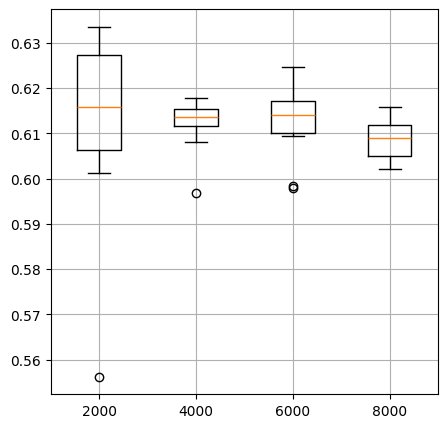

In [69]:
plt.figure(figsize=(5, 5))
plt.boxplot(scores[:5], labels=test_sizes[:5])
plt.grid()
plt.show()